# Concolutional Neural Network (CNN)

- libraries

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

- set the param

In [21]:

plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

- kernel / filters
- or we can say 3x3 matrix

In [22]:
kernel = tf.constant([[-1, -1, -1],
					[-1, 8, -1],
					[-1, -1, -1],
				])

- image loading

In [23]:
image = tf.io.read_file(r'D:\copy of htdocs\practice\Python\200days\Day190 Deep Learning Day 20\Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

- plotting image into B/W (Grayscale image)

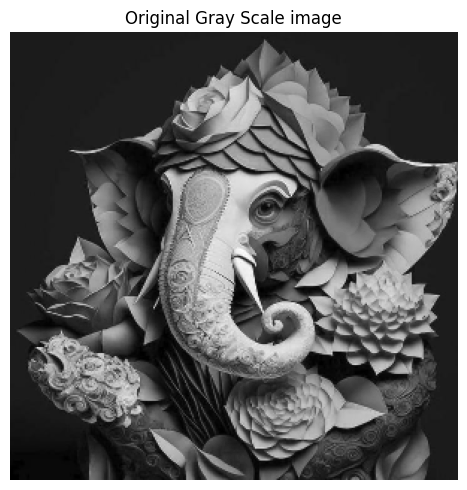

In [24]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

- reformatting the image

In [25]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

- convolutional layer

In [26]:
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
	input=image,
	filters=kernel,
	strides=1, # or (1, 1)
	padding='SAME',
)

- setting figure size

In [27]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

- convolved image

Text(0.5, 1.0, 'Convolution')

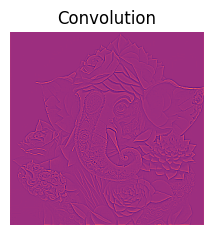

In [28]:
plt.subplot(1, 3, 1)

plt.imshow(
	tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

- activation layer

In [29]:
relu_fn = tf.nn.relu

- image detection

In [30]:

image_detect = relu_fn(image_filter)

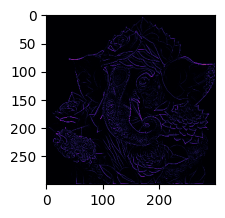

In [31]:
plt.subplot(1, 3, 2)
plt.imshow(
	# Reformat for plotting
	tf.squeeze(image_detect)
)

- pooling layeer

C:\Users\panka\AppData\Local\Temp\ipykernel_12068\1257030707.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 3)


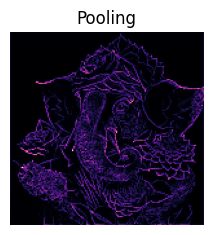

In [33]:
plt.axis('off')
plt.title('Activation')
pool = tf.nn.pool
image_condense = pool(input=image_detect,
							window_shape=(2, 2),
							pooling_type='MAX',
							strides=(2, 2),
							padding='SAME',
							)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()